SSIM index: 0.9766350379789327


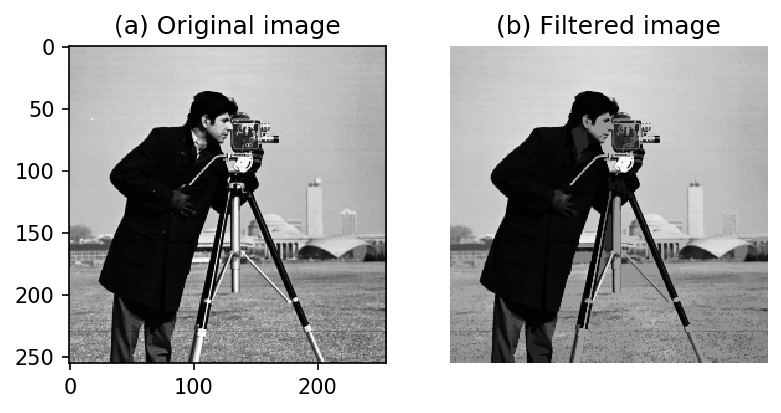

In [6]:
%matplotlib inline

import numpy as np
from PIL import Image
from siamxt.max_tree_alpha import MaxTreeAlpha
from matplotlib import pyplot as plt
from ssim_index import SSIMIndex

img = np.asarray(Image.open('test_images/cameraman.tif'))
Bc = np.ones((3, 3), dtype=bool)
mxt = MaxTreeAlpha(img, Bc)

n = 0.005
nleaves = (mxt.node_array[1, :] == 0).sum()
A = mxt.node_array[3, :]
Aext = mxt.computeExtinctionValues(A, "area")
mxt.extinctionFilter(Aext, int(n*nleaves))

filtered_img = mxt.getImage()

fig = plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(img, cmap='Greys_r')
plt.title("(a) Original image")
plt.subplot(1,2,2)
plt.imshow(filtered_img, cmap='Greys_r')
plt.title('(b) Filtered image')
plt.axis('off')
ssim = SSIMIndex(img, filtered_img)
print("SSIM index:", ssim)
